# Modeling and Simulation in Python

Jason's attempt at implementing the HIV model (*with* explicit dt, now fixed!).

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)

    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [3]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State(R, L, E, V)
    t: time
    system: System object
    
    returns: State(R, L, E, V)
    """
    unpack(system)
    R, L, E, V = state

    dRdt = (Gamma * tau) - (mu * R) - (beta * R * V)
    dLdt = (rho * beta * R * V) - (mu * L) - (alpha * L)
    dEdt = (1 - rho) * (beta * R * V) + (alpha * L) - (delta * E)
    dVdt = (pi * E) - (sigma * V)
    
    R += dRdt * dt
    L += dLdt * dt
    E += dEdt * dt
    V += dVdt * dt
    
    return State(R=R, L=L, E=E, V=V)

In [4]:
init = State(R=200, L=0, E=0, V=4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [5]:
system = System(Gamma=1.36,
                mu=1.36e-3,
                tau=0.2,
                beta=0.00027,
                rho=0.1,
                alpha=3.6e-2,
                sigma=2,
                delta=0.33,
                pi=100,
                t0=0,
                t_end=120,
                dt=0.1)

,values
Gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
t0,0.00000


In [6]:
update_func(init, 0, system)

,values
R,2.000000e+02
L,2.160000e-10
E,1.944000e-09
V,3.200000e-07


In [7]:
results = run_simulation(system, update_func)
results.head()

,R,L,E,V
0.0,200.0,0.000000e+00,0.000000e+00,4.000000e-07
0.1,200.0,2.160000e-10,1.944000e-09,3.200000e-07
0.2,200.0,3.879930e-10,3.435826e-09,2.754400e-07
0.3,200.0,5.352811e-10,4.662479e-09,2.547103e-07
0.4,200.0,6.708248e-10,5.748436e-09,2.503930e-07


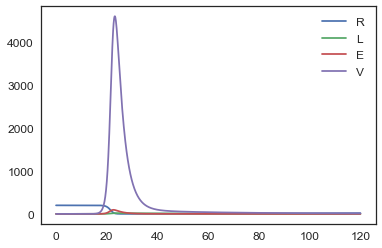

In [8]:
results.plot()

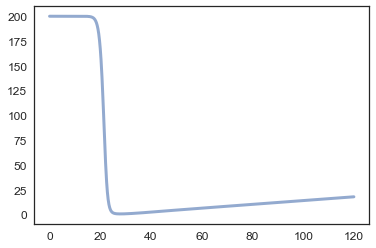

In [9]:
plot(results['R'])

[0, 120, 0.1, 100.0]

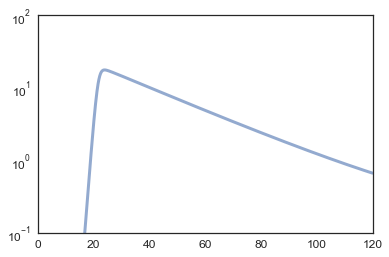

In [10]:
plot(results['L'])
plt.yscale('log')
plt.axis([0, 120, 1e-1, 1e2])

[0, 120, 0.1, 100.0]

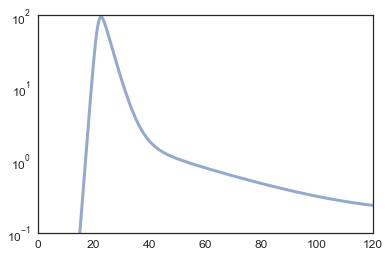

In [11]:
plot(results['E'])
plt.yscale('log')
plt.axis([0, 120, 1e-1, 1e2])

[0, 120, 0.1, 100000.0]

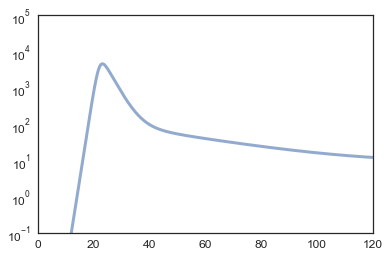

In [12]:
plot(results['V'])
plt.yscale('log')
plt.axis([0, 120, 1e-1, 1e5])

In [13]:
CD4_lymphocytes = (1000 * (1 - system.tau)) + results['R'] + results['L'] + results['E']

0.0      1000.000000
0.1      1000.000000
0.2      1000.000000
0.3      1000.000000
0.4      1000.000000
0.5      1000.000000
0.6      1000.000000
0.7      1000.000000
0.8      1000.000000
0.9      1000.000000
1.0      1000.000000
1.1      1000.000000
1.2      1000.000000
1.3      1000.000000
1.4      1000.000000
1.5      1000.000000
1.6      1000.000000
1.7      1000.000000
1.8      1000.000000
1.9      1000.000000
2.0      1000.000000
2.1      1000.000000
2.2      1000.000000
2.3      1000.000000
2.4      1000.000000
2.5      1000.000000
2.6      1000.000000
2.7      1000.000000
2.8      1000.000000
2.9      1000.000000
            ...     
117.1     818.382526
117.2     818.399109
117.3     818.415700
117.4     818.432298
117.5     818.448903
117.6     818.465515
117.7     818.482134
117.8     818.498761
117.9     818.515394
118.0     818.532034
118.1     818.548681
118.2     818.565335
118.3     818.581996
118.4     818.598663
118.5     818.615337
118.6     818.632018
118.7     818

[0, 120, 600, 1200]

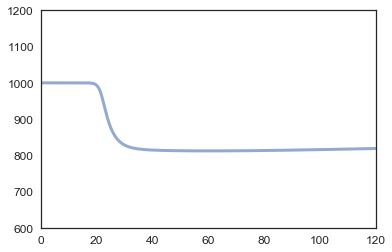

In [14]:
plot(CD4_lymphocytes)
plt.axis([0, 120, 600, 1200])